# Access the Tools located in TextbookSimulations

In [1]:
using TextbookSimulations

# Solve a Power-Flow Problem using PowerModels.jl

Read in data from a MATPOWER case file, solve the AC power-flow study using Los Alamos National Laboratory's (LANL's) `PowerModels.jl`, and present the resulting bus- and line-level solutions. The data in this example describes a small system that changes its generation and demand throughout the day.

This system includes a clean firm source (represented by the slack bus), two solar farms and one wind farm (represented with PV busses), and a central load.

This system contains two solar farms and one wind farm, represented by PV buses, one source of firm generation, represented by the slack bus, and one central load, represented by a PQ bus. The slack bus, as a source of firm generation, offsets the amount of power not able to be generated by the more variable renewable sources of power, and is a low-carbon source of power. The four power flows for this system represent the system in the morning, at around 7:30 am, when there is a medium-high load, the middle of the day, at around 12:30 pm, when the load is lighter, the evening, at around 6:30 pm, when the load is the highest, and the middle of the night, at around 2:30 am, when the load is the lightest. The power produced by the solar and wind farms also changes at each time of day to reflect the daily variability of a solar or wind farm.


# Renewables and Firm Source System in the Morning (~7:30 AM)

This power flow is characterized by by a large amount of generation from the solar and wind buses, which is enough to account for the loads at each renewabled source bus. The The overall load, represented by a PQ bus, is relatively large. This structure means that the firm generation, represented by the slack bus, contributes about the same as one of the solar buses. There is enough generation through the middle of the system that some power flows going back into the slack bus are providng active power. The largest power flows are seen going from the renewable buses to the load bus.

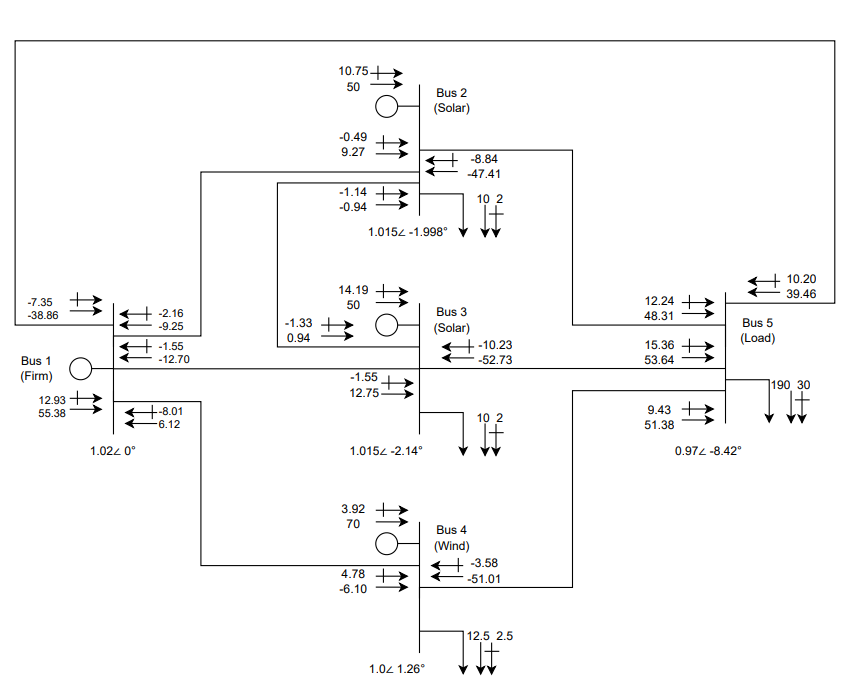

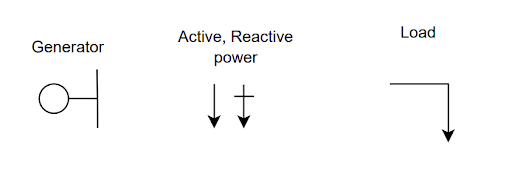

In [2]:
# Define the data directory and case name
file_path = joinpath(@__DIR__, "..", "data")
case_name = "renewable_firm_data"
file_type = ".m"

# Load the network data
network_data = load_network_data(file_path, case_name, file_type)

[info | PowerModels]: removing 3 cost terms from generator 4: Float64[]
[info | PowerModels]: removing 3 cost terms from generator 1: Float64[]
[info | PowerModels]: removing 3 cost terms from generator 2: Float64[]
[info | PowerModels]: removing 3 cost terms from generator 3: Float64[]


Dict{String, Any} with 13 entries:
  "bus"            => Dict{String, Any}("4"=>Dict{String, Any}("zone"=>1, "bus_…
  "source_type"    => "matpower"
  "name"           => "renewable_firm_data"
  "dcline"         => Dict{String, Any}()
  "source_version" => "2"
  "gen"            => Dict{String, Any}("4"=>Dict{String, Any}("ncost"=>0, "qc1…
  "branch"         => Dict{String, Any}("8"=>Dict{String, Any}("br_r"=>0.01335,…
  "storage"        => Dict{String, Any}()
  "switch"         => Dict{String, Any}()
  "baseMVA"        => 100
  "per_unit"       => true
  "shunt"          => Dict{String, Any}()
  "load"           => Dict{String, Any}("4"=>Dict{String, Any}("source_id"=>Any…

In [3]:
# Solve the power-flow problem
result = compute_ac_pf(network_data)

Dict{String, Any} with 5 entries:
  "optimizer"          => "NLsolve"
  "termination_status" => true
  "objective"          => 0.0
  "solution"           => Dict{String, Any}("gen"=>Dict{String, Any}("4"=>Dict(…
  "solve_time"         => 0.477746

In [4]:
# Print bus-level results
bus_results = organize_bus_results(result, network_data)

Row,Bus Number,Bus Type,Voltage Magnitude (p.u.),Voltage Angle (degrees),Real Power Generated (MW),Reactive Power Generated (MVAR),Real Power Load (MW),Reactive Power Load (MVAR)
,Int64,String,Float64,Float64,Float64,Float64,Float64,Float64
1,1,Slack,1.02,0.0,55.3817,12.934,0.0,0.0
2,2,PV,1.015,-1.99808,50.0,10.7521,10.0,2.0
3,3,PV,1.015,-2.13717,50.0,14.1888,10.0,2.0
4,4,PV,1.0,1.26393,70.0,3.91916,12.5,2.5
5,5,PQ,0.971739,-8.42286,0.0,0.0,190.0,30.0


In [5]:
# Print line-level results
line_results = organize_line_results(result, network_data)

Row,Bus i,Bus j,Real Power Flow from Bus i to Bus j (MW),Real Power Flow from Bus j to Bus i (MW),Real Power Flow Losses (MW),Reactive Power Flow from Bus i to Bus j (MVAR),Reactive Power Flow from Bus j to Bus i (MVAR),Reactive Power Flow Losses (MVAR)
,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,1,2,9.26509,-9.24892,0.0161781,-0.493864,-2.16085,-2.65472
2,1,3,12.7546,-12.7013,0.0532881,-1.55243,-2.02996,-3.58239
3,1,5,39.4637,-38.8592,0.604517,10.1963,-7.35484,2.84142
4,1,4,-6.10178,6.12262,0.0208331,4.78407,-8.01095,-3.22688
5,2,3,0.941397,-0.941174,0.000222868,-1.32693,-1.14332,-2.47025
6,2,5,48.3075,-47.4051,0.902408,12.2399,-8.83648,3.40344
7,3,5,53.6425,-52.7268,0.915719,15.3621,-10.2279,5.13418
8,4,5,51.3774,-51.0089,0.368486,9.43011,-3.58074,5.84937


# Renewables and Firm Source System Midday (~12:30 PM)

This power flow is chacterized by increased solar generation, lower wind generation, and a lower system load. Similarly to the morning power flow, there is enough generation through the middle of the system that some power flows going back into the slack bus are providng active power. The largest power flows are seen going from the renewable buses to the load bus. The firm bus is providing a slightly larger amount of power to the system. The solar buses are providing the majority of the generation to the load bus.

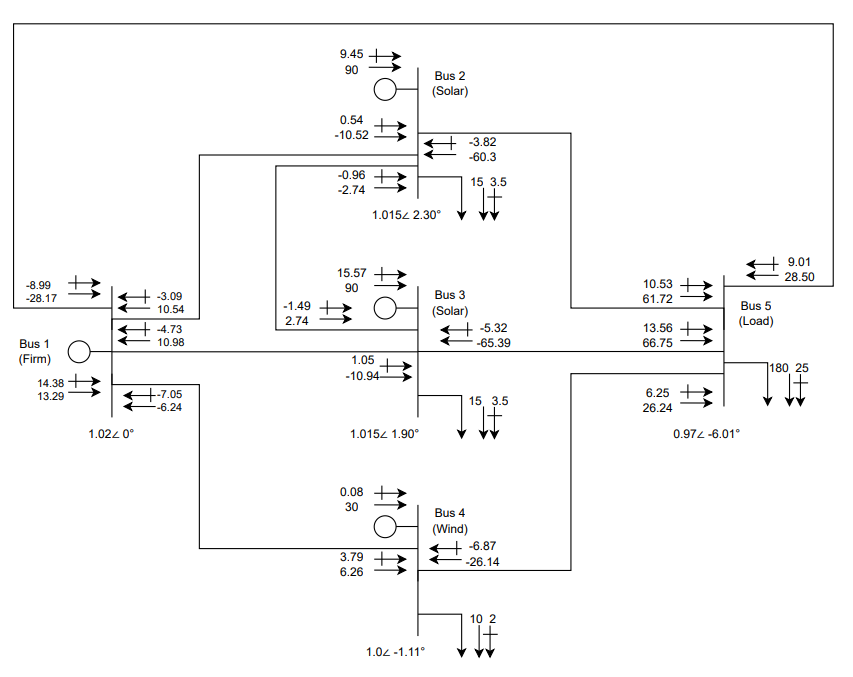

In [6]:
# Define the data directory and case name
file_path = joinpath(@__DIR__, "..", "data")
case_name = "renewable_firm_data"
file_type = ".m"

# Load the network data
network_data = load_network_data(file_path, case_name, file_type)

[info | PowerModels]: removing 3 cost terms from generator 4: Float64[]
[info | PowerModels]: removing 3 cost terms from generator 1: Float64[]
[info | PowerModels]: removing 3 cost terms from generator 2: Float64[]
[info | PowerModels]: removing 3 cost terms from generator 3: Float64[]


Dict{String, Any} with 13 entries:
  "bus"            => Dict{String, Any}("4"=>Dict{String, Any}("zone"=>1, "bus_…
  "source_type"    => "matpower"
  "name"           => "renewable_firm_data"
  "dcline"         => Dict{String, Any}()
  "source_version" => "2"
  "gen"            => Dict{String, Any}("4"=>Dict{String, Any}("ncost"=>0, "qc1…
  "branch"         => Dict{String, Any}("8"=>Dict{String, Any}("br_r"=>0.01335,…
  "storage"        => Dict{String, Any}()
  "switch"         => Dict{String, Any}()
  "baseMVA"        => 100
  "per_unit"       => true
  "shunt"          => Dict{String, Any}()
  "load"           => Dict{String, Any}("4"=>Dict{String, Any}("source_id"=>Any…

In [7]:
#Change the reactive power demand of the solar farms at bus 2 and 3, the wind farm at bus 4, and the load at bus 5
change_bus_reactive_power_demand!(3.5, 2, network_data)
change_bus_reactive_power_demand!(3.5, 3, network_data)
change_bus_reactive_power_demand!(2, 4, network_data)
change_bus_reactive_power_demand!(25, 5, network_data)

0.25

In [8]:
#Change the active power demand of the solar farms at bus 2 and 3, the wind farm at bus 4, and the load at bus 5 
change_bus_real_power_demand!(15, 2, network_data)
change_bus_real_power_demand!(15, 3, network_data)
change_bus_real_power_demand!(10, 4, network_data)
change_bus_real_power_demand!(180, 5, network_data)

1.8

In [9]:
#Change the active power generation of the solar farms at bus 2 and 3 and the wind farm at bus 4
change_bus_real_power_generation!(90, 2, network_data)
change_bus_real_power_generation!(90, 3, network_data)
change_bus_real_power_generation!(30, 4, network_data)

0.3

In [10]:
# Solve the power-flow problem
result = compute_ac_pf(network_data)

Dict{String, Any} with 5 entries:
  "optimizer"          => "NLsolve"
  "termination_status" => true
  "objective"          => 0.0
  "solution"           => Dict{String, Any}("gen"=>Dict{String, Any}("4"=>Dict(…
  "solve_time"         => 0.00112104

In [11]:
# Print bus-level results
bus_results = organize_bus_results(result, network_data)

Row,Bus Number,Bus Type,Voltage Magnitude (p.u.),Voltage Angle (degrees),Real Power Generated (MW),Reactive Power Generated (MVAR),Real Power Load (MW),Reactive Power Load (MVAR)
,Int64,String,Float64,Float64,Float64,Float64,Float64,Float64
1,1,Slack,1.02,0.0,13.2908,14.3815,0.0,0.0
2,2,PV,1.015,2.3037,90.0,9.45332,15.0,3.5
3,3,PV,1.015,1.89919,90.0,11.3715,15.0,3.5
4,4,PV,1.0,-1.10974,30.0,1.20629,10.0,2.0
5,5,PQ,0.975003,-6.00567,0.0,0.0,180.0,25.0


In [12]:
line_results = organize_line_results(result, network_data)

Row,Bus i,Bus j,Real Power Flow from Bus i to Bus j (MW),Real Power Flow from Bus j to Bus i (MW),Real Power Flow Losses (MW),Reactive Power Flow from Bus i to Bus j (MVAR),Reactive Power Flow from Bus j to Bus i (MVAR),Reactive Power Flow Losses (MVAR)
,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,1,2,-10.5235,10.5449,0.0214012,0.538123,-3.08727,-2.54915
2,1,3,-10.9406,10.9829,0.0422733,1.05023,-4.73101,-3.68079
3,1,5,28.4975,-28.1676,0.329943,9.00777,-8.99112,0.0166534
4,1,4,6.25745,-6.23926,0.0181902,3.78536,-7.0455,-3.26014
5,2,3,2.73834,-2.73646,0.0018849,-1.49359,-0.959627,-2.45321
6,2,5,61.7167,-60.3007,1.41607,10.5342,-3.81887,6.71531
7,3,5,66.7535,-65.3925,1.36101,13.5622,-5.32095,8.24122
8,4,5,26.2393,-26.1392,0.10004,6.2518,-6.86906,-0.61726


# Renewables and Firm Source System in the Evening (~6:30 PM)

This power flow is characterized by an increased load, increased wind generation, and decreased solar generation. The solar, wind and firm buses contribute approximately equally to the load bus, and the solar buses also absorb active power from the firm bus. A majority of the active and reactive power is flowing from the the left to the right of the system.

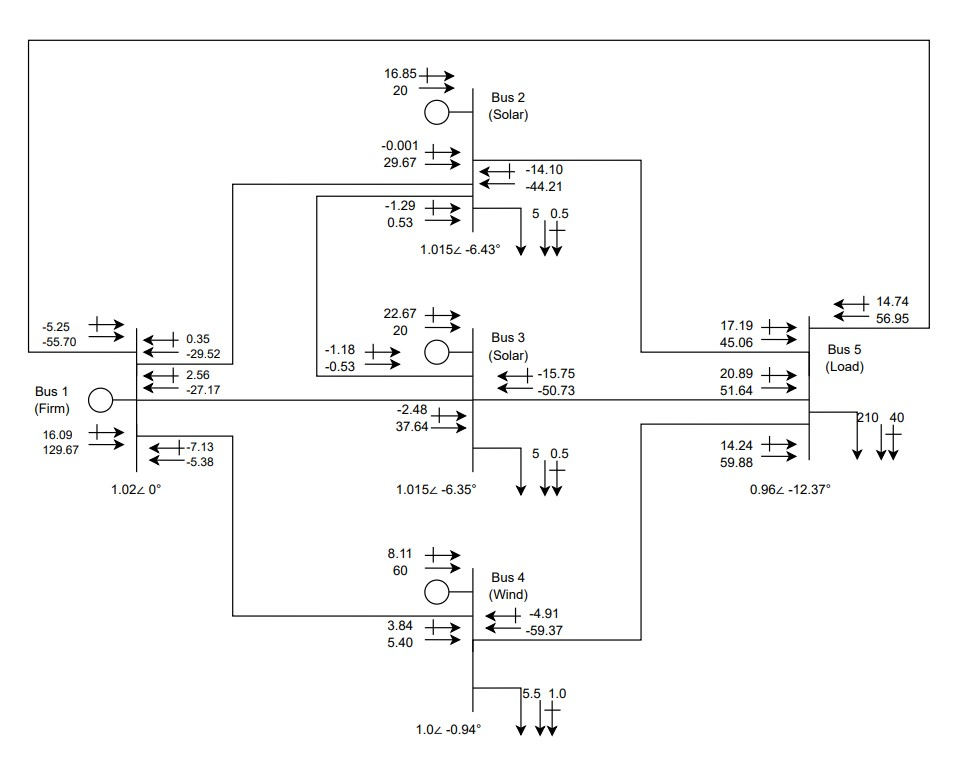

In [13]:
# Define the data directory and case name
file_path = joinpath(@__DIR__, "..", "data")
case_name = "renewable_firm_data"
file_type = ".m"

# Load the network data
network_data = load_network_data(file_path, case_name, file_type)

[info | PowerModels]: removing 3 cost terms from generator 4: Float64[]
[info | PowerModels]: removing 3 cost terms from generator 1: Float64[]
[info | PowerModels]: removing 3 cost terms from generator 2: Float64[]
[info | PowerModels]: removing 3 cost terms from generator 3: Float64[]


Dict{String, Any} with 13 entries:
  "bus"            => Dict{String, Any}("4"=>Dict{String, Any}("zone"=>1, "bus_…
  "source_type"    => "matpower"
  "name"           => "renewable_firm_data"
  "dcline"         => Dict{String, Any}()
  "source_version" => "2"
  "gen"            => Dict{String, Any}("4"=>Dict{String, Any}("ncost"=>0, "qc1…
  "branch"         => Dict{String, Any}("8"=>Dict{String, Any}("br_r"=>0.01335,…
  "storage"        => Dict{String, Any}()
  "switch"         => Dict{String, Any}()
  "baseMVA"        => 100
  "per_unit"       => true
  "shunt"          => Dict{String, Any}()
  "load"           => Dict{String, Any}("4"=>Dict{String, Any}("source_id"=>Any…

In [41]:
#Change the reactive power demand of the solar farms at bus 2 and 3, the wind farm at bus 4, and the load at bus 5
change_bus_reactive_power_demand!(0.5, 2, network_data)
change_bus_reactive_power_demand!(0.5, 3, network_data)
change_bus_reactive_power_demand!(1, 4, network_data)
change_bus_reactive_power_demand!(40, 5, network_data)

0.4

In [14]:
#Change the active power demand of the solar farms at bus 2 and 3, the wind farm at bus 4, and the load at bus 5
change_bus_real_power_demand!(5, 2, network_data)
change_bus_real_power_demand!(5, 3, network_data)
change_bus_real_power_demand!(5.5, 4, network_data)
change_bus_real_power_demand!(210, 5, network_data)

2.1

In [15]:
#Change the active power generation of the solar farms at bus 2 and 3 and the wind farm at bus 4
change_bus_real_power_generation!(20, 2, network_data)
change_bus_real_power_generation!(20, 3, network_data)
change_bus_real_power_generation!(60, 4, network_data)

0.6

In [16]:
# Solve the power-flow problem
result = compute_ac_pf(network_data)

Dict{String, Any} with 5 entries:
  "optimizer"          => "NLsolve"
  "termination_status" => true
  "objective"          => 0.0
  "solution"           => Dict{String, Any}("gen"=>Dict{String, Any}("4"=>Dict(…
  "solve_time"         => 0.000599146

In [17]:
# Print bus-level results
bus_results = organize_bus_results(result, network_data)

Row,Bus Number,Bus Type,Voltage Magnitude (p.u.),Voltage Angle (degrees),Real Power Generated (MW),Reactive Power Generated (MVAR),Real Power Load (MW),Reactive Power Load (MVAR)
,Int64,String,Float64,Float64,Float64,Float64,Float64,Float64
1,1,Slack,1.02,0.0,129.551,14.0748,0.0,0.0
2,2,PV,1.015,-6.40132,20.0,15.1945,5.0,2.0
3,3,PV,1.015,-6.32454,20.0,20.5667,5.0,2.0
4,4,PV,1.0,-0.964383,60.0,7.28514,5.5,2.5
5,5,PQ,0.967787,-12.3354,0.0,0.0,210.0,30.0


In [18]:
line_results = organize_line_results(result, network_data)

Row,Bus i,Bus j,Real Power Flow from Bus i to Bus j (MW),Real Power Flow from Bus j to Bus i (MW),Real Power Flow Losses (MW),Reactive Power Flow from Bus i to Bus j (MVAR),Reactive Power Flow from Bus j to Bus i (MVAR),Reactive Power Flow Losses (MVAR)
,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,1,2,29.542,-29.379,0.16298,-0.00992016,0.322292,0.312372
2,1,3,37.4663,-37.0071,0.459203,-2.48287,2.52665,0.0437748
3,1,5,57.0428,-55.8112,1.23156,12.7358,-3.45501,9.28079
4,1,4,5.49952,-5.4835,0.0160131,3.8318,-7.11934,-3.28754
5,2,3,-0.519553,0.519621,6.79083e-5,-1.18525,-1.2866,-2.47184
6,2,5,44.8985,-44.0913,0.807244,14.0575,-11.2596,2.79784
7,3,5,51.4875,-50.6185,0.869046,17.3266,-12.5136,4.813
8,4,5,59.9835,-59.479,0.504502,11.9045,-2.77172,9.13276


# Renewables and Firm Source System at Night (~2:30 AM)

This power flow is characterized by the smallest load, no solar generation, and the largest amount of wind generation. The firm generation bus provides active and reactive power to the solar buses and the load bus. The wind bus generates enough active power that it delivers active power to the firm generation. The wind bus provides the most amount of active power to the load bus. The active power delivered by the solar buses to the load bus is a result of the power delivered to the solar buses by the firm bus.

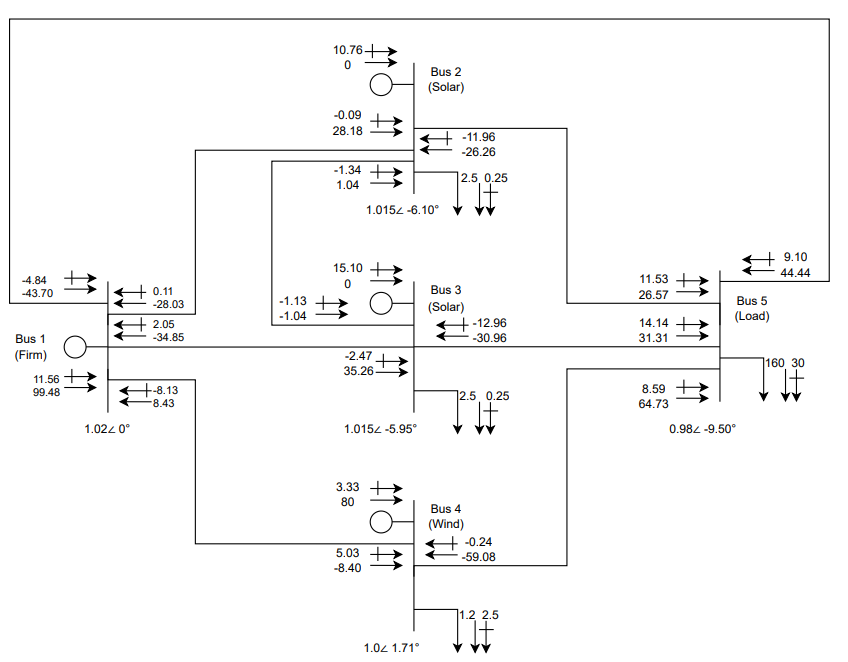

In [19]:
# Define the data directory and case name
file_path = joinpath(@__DIR__, "..", "data")
case_name = "renewable_firm_data"
file_type = ".m"

# Load the network data
network_data = load_network_data(file_path, case_name, file_type)

[info | PowerModels]: removing 3 cost terms from generator 4: Float64[]
[info | PowerModels]: removing 3 cost terms from generator 1: Float64[]
[info | PowerModels]: removing 3 cost terms from generator 2: Float64[]
[info | PowerModels]: removing 3 cost terms from generator 3: Float64[]


Dict{String, Any} with 13 entries:
  "bus"            => Dict{String, Any}("4"=>Dict{String, Any}("zone"=>1, "bus_…
  "source_type"    => "matpower"
  "name"           => "renewable_firm_data"
  "dcline"         => Dict{String, Any}()
  "source_version" => "2"
  "gen"            => Dict{String, Any}("4"=>Dict{String, Any}("ncost"=>0, "qc1…
  "branch"         => Dict{String, Any}("8"=>Dict{String, Any}("br_r"=>0.01335,…
  "storage"        => Dict{String, Any}()
  "switch"         => Dict{String, Any}()
  "baseMVA"        => 100
  "per_unit"       => true
  "shunt"          => Dict{String, Any}()
  "load"           => Dict{String, Any}("4"=>Dict{String, Any}("source_id"=>Any…

In [20]:
# Change the reactive power demand of the solar farms at bus 2 and 3, the wind farm at bus 4, and the load at bus 5
change_bus_reactive_power_demand!(0.25, 2, network_data)
change_bus_reactive_power_demand!(0.25, 3, network_data)
change_bus_reactive_power_demand!(2.5, 4, network_data)
change_bus_reactive_power_demand!(30, 5, network_data)

0.3

In [21]:
#Change the active power demand of the solar farms at bus 2 and 3, the wind farm at bus 4, and the load at bus 5
change_bus_real_power_demand!(2.5, 2, network_data)
change_bus_real_power_demand!(2.5, 3, network_data)
change_bus_real_power_demand!(12, 4, network_data)
change_bus_real_power_demand!(160, 5, network_data)

1.6

In [22]:
#Change the active power generation of the solar farms at bus 2 and 3 and the wind farm at bus 4
change_bus_real_power_generation!(0, 2, network_data)
change_bus_real_power_generation!(0, 3, network_data)
change_bus_real_power_generation!(80, 4, network_data)

0.8

In [23]:
# Solve the power-flow problem
result = compute_ac_pf(network_data)

Dict{String, Any} with 5 entries:
  "optimizer"          => "NLsolve"
  "termination_status" => true
  "objective"          => 0.0
  "solution"           => Dict{String, Any}("gen"=>Dict{String, Any}("4"=>Dict(…
  "solve_time"         => 0.00132203

In [24]:
# Print bus-level results
bus_results = organize_bus_results(result, network_data)

Row,Bus Number,Bus Type,Voltage Magnitude (p.u.),Voltage Angle (degrees),Real Power Generated (MW),Reactive Power Generated (MVAR),Real Power Load (MW),Reactive Power Load (MVAR)
,Int64,String,Float64,Float64,Float64,Float64,Float64,Float64
1,1,Slack,1.02,0.0,99.4806,11.561,0.0,0.0
2,2,PV,1.015,-6.10497,0.0,10.755,2.5,0.25
3,3,PV,1.015,-5.95088,0.0,15.0997,2.5,0.25
4,4,PV,1.0,1.7066,80.0,3.32541,12.0,2.5
5,5,PQ,0.97693,-9.50039,0.0,0.0,160.0,30.0


In [25]:
# Print line-level results
line_results = organize_line_results(result, network_data)

Row,Bus i,Bus j,Real Power Flow from Bus i to Bus j (MW),Real Power Flow from Bus j to Bus i (MW),Real Power Flow Losses (MW),Reactive Power Flow from Bus i to Bus j (MVAR),Reactive Power Flow from Bus j to Bus i (MVAR),Reactive Power Flow Losses (MVAR)
,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,1,2,28.179,-28.0307,0.148281,-0.0913893,0.106679,0.0152896
2,1,3,35.2592,-34.8525,0.406697,-2.47327,2.04799,-0.425279
3,1,5,44.444,-43.6998,0.74419,9.09875,-4.84296,4.25579
4,1,4,-8.40156,8.43189,0.0303282,5.02693,-8.1343,-3.10737
5,2,3,-1.04263,1.04291,0.000273516,-1.13317,-1.33657,-2.46974
6,2,5,26.5733,-26.2613,0.312015,11.5315,-11.9561,-0.424589
7,3,5,31.3096,-30.9592,0.350386,14.1383,-12.9604,1.17789
8,4,5,59.5681,-59.0797,0.488452,8.9597,-0.240556,8.71914
